# FIFA 2019 Player Value Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df = pd.read_csv('./data.csv')

In [2]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df = df.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo'], axis =1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 85 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Real Face                   18159 non-null object
Position                    18147 non-null 

`Loaned From` has the least amount of data, and it doesn't seem like it would have much effect on our player value prediction.

So I am going to drop `Loaned From`.

In [5]:
df = df.drop(['Loaned From'], axis=1)

In [6]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Let's do some Data Analysis!

### Top 10 countries with highest amount of players

In [7]:
print(df['Nationality'].value_counts().head(10))

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64


### Top 10 countries with highest player overall average

In [8]:
nationality = df.groupby('Nationality')
print(nationality['Overall'].agg(np.mean).sort_values(ascending=False).head(10))

Nationality
United Arab Emirates    77.000000
Central African Rep.    73.333333
Israel                  72.142857
Dominican Republic      72.000000
Oman                    72.000000
São Tomé & Príncipe     72.000000
Cape Verde              71.631579
Portugal                71.344720
Togo                    71.333333
Brazil                  71.251511
Name: Overall, dtype: float64


We can see that the UAE has the highest average overall, but could be due to the number of players that the UAE has.

In [9]:
nationality = df['Nationality'].value_counts()
print(nationality)

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
                        ... 
Dominican Republic         2
Hong Kong                  2
Bermuda                    2
Uzbekistan    

We can see that only Brazil has a significan amount of players that average a high overall score.

Let's find out players with the highest potential and highest overall performance

In [10]:
print('Highest Overall: {0}'.format(df.loc[df['Overall'].idxmax()][1]))
print('Highest Potential: {0}'.format(df.loc[df['Potential'].idxmax()][1]))

Highest Overall: L. Messi
Highest Potential: K. Mbappé


Now let's find out the best player in each attribute.

In [11]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioni

In [12]:
att_cols = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

i = 0
while i < len(att_cols):
    print('Best {0}: {1}'.format(att_cols[i], df.loc[df[att_cols[i]].idxmax()][1]))
    i += 1

Best Crossing: K. De Bruyne
Best Finishing: L. Messi
Best HeadingAccuracy: Naldo
Best ShortPassing: L. Modrić
Best Volleys: E. Cavani
Best Dribbling: L. Messi
Best Curve: Quaresma
Best FKAccuracy: L. Messi
Best LongPassing: T. Kroos
Best BallControl: L. Messi
Best Acceleration: Douglas Costa
Best SprintSpeed: K. Mbappé
Best Agility: Neymar Jr
Best Reactions: Cristiano Ronaldo
Best Balance: Bernard
Best ShotPower: Cristiano Ronaldo
Best Jumping: Cristiano Ronaldo
Best Stamina: N. Kanté
Best Strength: A. Akinfenwa
Best LongShots: L. Messi
Best Aggression: B. Pearson
Best Interceptions: N. Kanté
Best Positioning: Cristiano Ronaldo
Best Vision: L. Messi
Best Penalties: M. Balotelli
Best Composure: L. Messi
Best Marking: A. Barzagli
Best StandingTackle: G. Chiellini
Best SlidingTackle: Sergio Ramos
Best GKDiving: De Gea
Best GKHandling: J. Oblak
Best GKKicking: M. Neuer
Best GKPositioning: G. Buffon
Best GKReflexes: De Gea


### Feature Engineering and Data Cleaning

In [13]:
def value_to_int(df_val):
    try:
        val = float(df_val[1:-1])
        suffix = df_val[-1:]
        
        if suffix == 'M':
            val = val * 1000000
        elif suffix == 'K':
            val = val * 1000
    except ValueError:
        val = 0
    return val

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [14]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Who are the top earners and most valued players?

In [28]:
value = df[['Name','Value']]

print('Most valued players : \n{0}'.format(value.nlargest(5, 'Value')))

Most valued players : 
            Name        Value
2      Neymar Jr  118500000.0
0       L. Messi  110500000.0
4   K. De Bruyne  102000000.0
5      E. Hazard   93000000.0
15     P. Dybala   89000000.0


In [29]:
wage = df[['Name', 'Wage']]

print('Highest earning players: \n{0}'.format(wage.nlargest(5, 'Wage')))

Highest earning players: 
                Name      Wage
0           L. Messi  565000.0
7          L. Suárez  455000.0
6          L. Modrić  420000.0
1  Cristiano Ronaldo  405000.0
8       Sergio Ramos  380000.0


Let's analyze the players potential according to their age

/Users/khalid/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


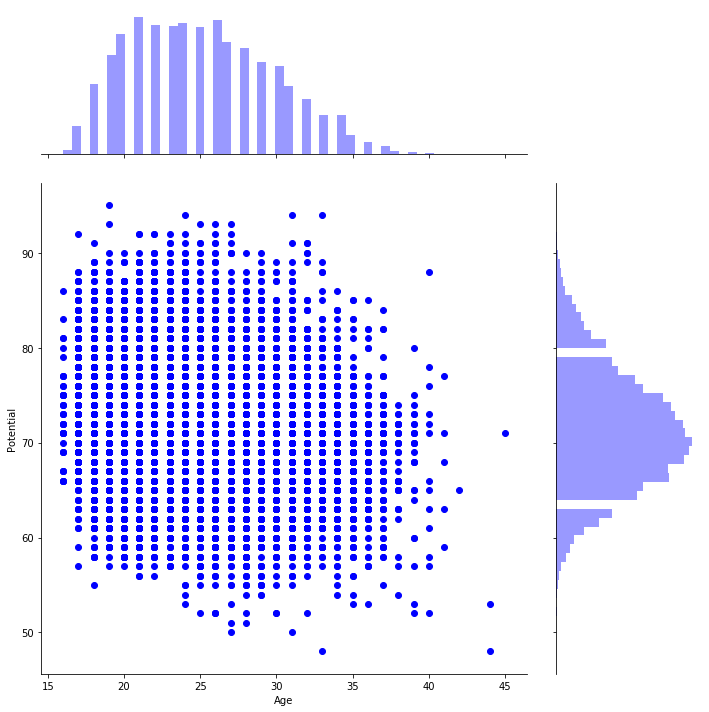

In [38]:
sns.jointplot(x=df['Age'], y=df['Potential'],
             height=10, ratio=3, color='b')

We can see that the players' potential drops as they grow older. 
Older players have low potential and there are exception for some old players with high potential. However past the age of 40, you see a huge drop in potential. 

Let's see what else does `Age` effect in the players attribute